<a href="https://colab.research.google.com/github/rajlm10/Touchstone-Foundation/blob/main/EDA_Kaggle_Bikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset = pd.read_csv('day.csv')

In [3]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     499 non-null    int64  
 1   dteday      499 non-null    object 
 2   season      499 non-null    int64  
 3   yr          499 non-null    int64  
 4   mnth        499 non-null    int64  
 5   holiday     499 non-null    int64  
 6   weekday     499 non-null    int64  
 7   workingday  499 non-null    int64  
 8   weathersit  499 non-null    int64  
 9   temp        499 non-null    float64
 10  atemp       499 non-null    float64
 11  hum         499 non-null    float64
 12  windspeed   499 non-null    float64
 13  casual      499 non-null    int64  
 14  registered  499 non-null    int64  
 15  cnt         499 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 62.5+ KB


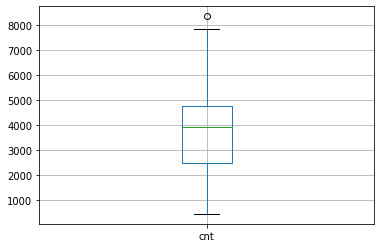

In [5]:
dataset.boxplot(column=['cnt'])
plt.show()

In [6]:
def replace_outlier_withIQR(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range,upper_range

In [7]:
lowcnt,upcnt=replace_outlier_withIQR(dataset['cnt'])
dataset['cnt']=np.where(dataset['cnt']>upcnt,upcnt,dataset['cnt'])
dataset['cnt']=np.where(dataset['cnt']<lowcnt,lowcnt,dataset['cnt'])

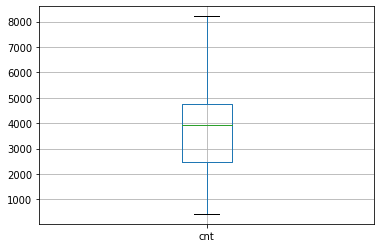

In [8]:
dataset.boxplot(column=['cnt'])
plt.show()

In [9]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,250.000000,2.206413,0.268537,5.515030,0.028056,2.995992,0.683367,1.408818,18.979325,22.316516,62.601307,13.212513,706.577154,3030.551102,3736.822144
std,144.193157,1.095573,0.443643,3.459066,0.165299,2.009012,0.465630,0.557175,7.350670,8.038017,15.282889,5.278390,612.099032,1194.650805,1537.593912
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,9.000000,416.000000,431.000000
25%,125.500000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,12.998189,15.843550,50.666050,9.313000,226.500000,2111.500000,2463.000000
50%,250.000000,2.000000,0.000000,5.000000,0.000000,3.000000,1.000000,1.000000,18.518347,22.222300,62.666700,12.707689,603.000000,3176.000000,3926.000000
75%,374.500000,3.000000,1.000000,8.000000,0.000000,5.000000,1.000000,2.000000,25.215000,28.725925,73.791650,16.083618,900.000000,3845.500000,4761.500000
max,499.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,34.815847,42.044800,97.250000,34.000021,3252.000000,5950.000000,8209.250000


In [10]:
dataset.isnull().sum()
#median_col_name=dataset['col'].median()
#dataset['col'].replace(np.nan,median_col_name,inplace=True)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
duplicates=dataset.duplicated()
duplicates.sum()
#dataset.drop_duplicates(inplace=True)
#duplicates=dataset.duplicated()
#duplicates.sum()

0

In [12]:
df_num = dataset.select_dtypes(include = ['float64', 'int64'])
del df_num['instant']
df_num.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985.0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801.0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349.0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562.0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600.0


In [13]:
df_num.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.440651,0.865255,-0.009866,-0.001448,0.010286,0.048987,0.443957,0.447903,0.262581,-0.226985,0.212756,0.256280,0.283853
yr,-0.440651,1.000000,-0.482860,0.006585,-0.010055,-0.005552,-0.038843,-0.218894,-0.210723,-0.190814,0.121607,0.078743,0.417900,0.355709
mnth,0.865255,-0.482860,1.000000,0.009797,0.015901,0.002961,0.029104,0.383480,0.390125,0.264647,-0.232266,0.143103,0.175519,0.193485
holiday,-0.009866,0.006585,0.009797,1.000000,-0.102455,-0.249598,-0.037576,-0.028749,-0.038892,-0.049892,0.035696,0.040028,-0.107448,-0.067514
weekday,-0.001448,-0.010055,0.015901,-0.102455,1.000000,0.035133,0.058871,-0.012603,-0.012535,-0.027003,0.016162,0.026341,0.042210,0.043083
workingday,0.010286,-0.005552,0.002961,-0.249598,0.035133,1.000000,0.058771,0.058716,0.063088,0.026035,-0.009758,-0.502092,0.326616,0.053755
weathersit,0.048987,-0.038843,0.029104,-0.037576,0.058871,0.058771,1.000000,-0.070571,-0.072851,0.584478,0.026112,-0.216683,-0.266699,-0.293686
temp,0.443957,-0.218894,0.383480,-0.028749,-0.012603,0.058716,-0.070571,1.000000,0.996325,0.184930,-0.132151,0.527648,0.525363,0.618083
atemp,0.447903,-0.210723,0.390125,-0.038892,-0.012535,0.063088,-0.072851,0.996325,1.000000,0.195306,-0.157681,0.531608,0.537689,0.629237
hum,0.262581,-0.190814,0.264647,-0.049892,-0.027003,0.026035,0.584478,0.184930,0.195306,1.000000,-0.279102,-0.042922,-0.095201,-0.091144


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54448cdd90>,
      dtype=object)

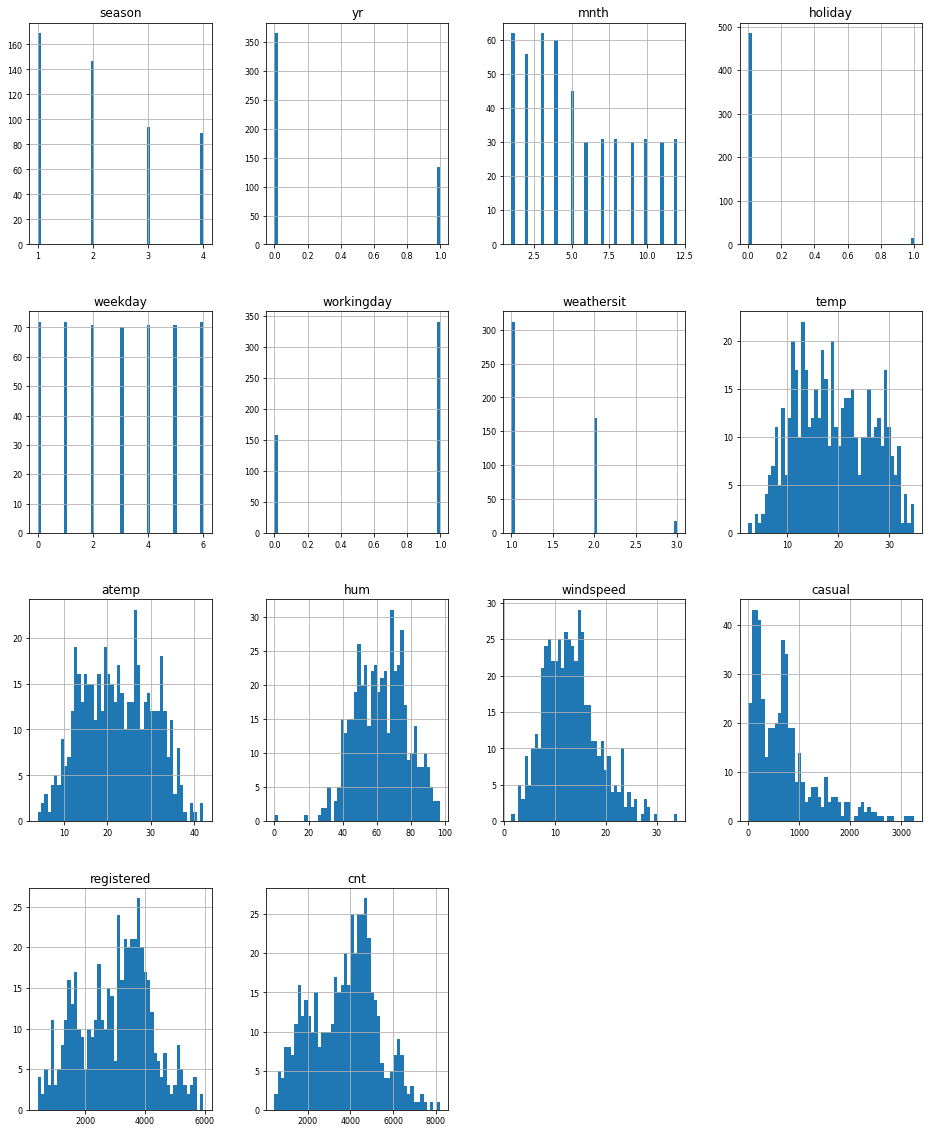

In [14]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [15]:
df_num_corr=df_num.corr()['cnt'][:-1]
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print(len(golden_features_list))
golden_features_list #Ask


4


registered    0.930311
casual        0.697745
atemp         0.629237
temp          0.618083
Name: cnt, dtype: float64

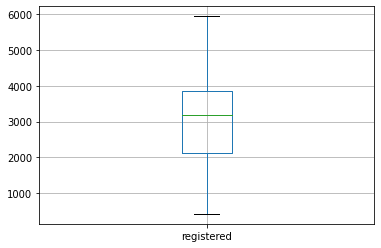

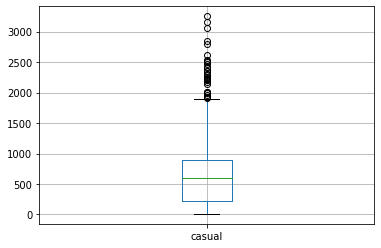

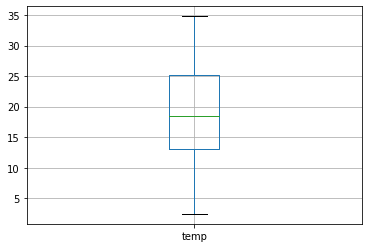

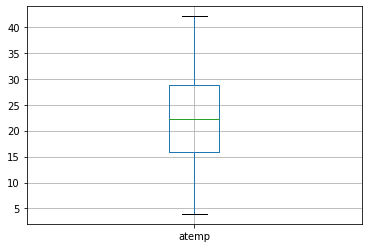

In [16]:
dataset.boxplot(column=['registered'])
plt.show()
dataset.boxplot(column=['casual'])
plt.show()
dataset.boxplot(column=['temp'])
plt.show()
dataset.boxplot(column=['atemp'])
plt.show()



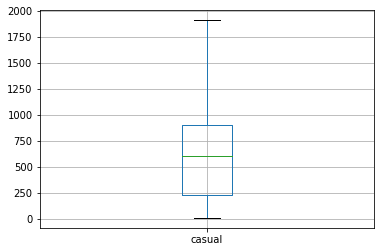

4


registered    0.930311
casual        0.706424
atemp         0.629237
temp          0.618083
Name: cnt, dtype: float64

In [17]:
lowcnt,upcnt=replace_outlier_withIQR(dataset['casual'])
dataset['casual']=np.where(dataset['casual']>upcnt,upcnt,dataset['casual'])
dataset['casual']=np.where(dataset['casual']<lowcnt,lowcnt,dataset['casual'])
dataset.boxplot(column=['casual'])
plt.show()
df_num = dataset.select_dtypes(include = ['float64', 'int64'])
del df_num['instant']
df_num_corr=df_num.corr()['cnt'][:-1]
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print(len(golden_features_list))
golden_features_list

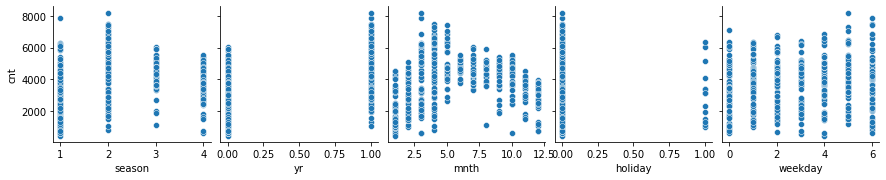

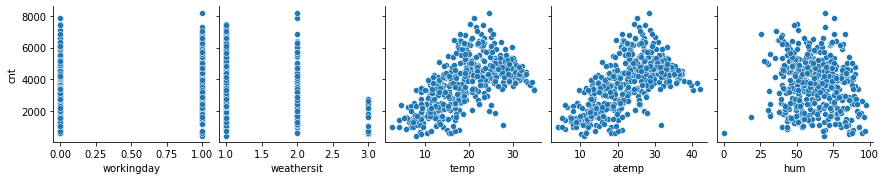

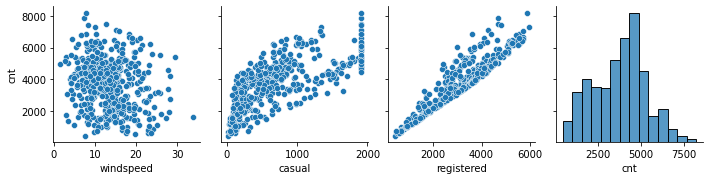

In [18]:
import seaborn as sns
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['cnt'])


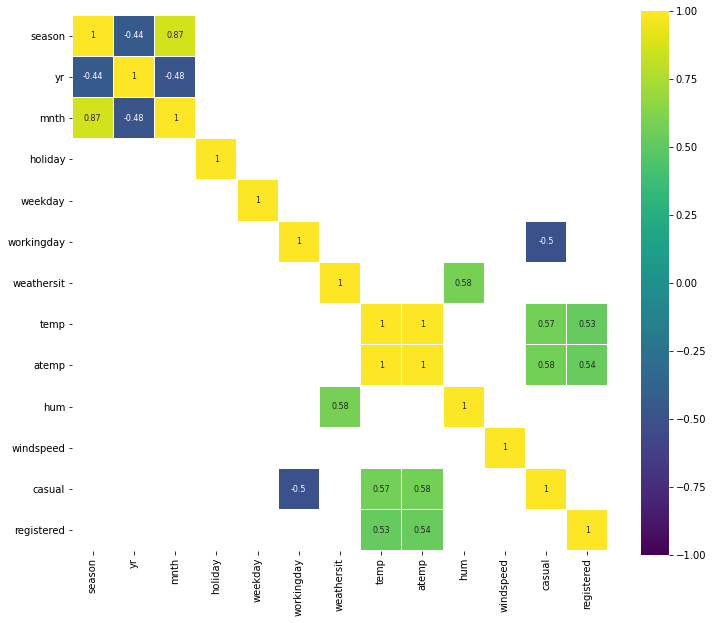

In [19]:
corr = df_num.drop('cnt', axis=1).corr() # We already examined cnt correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);